In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

from pandas import DataFrame, Series
from pandas_datareader import data as pdr
from matplotlib import cm
from yahoo_fin import options

# Needs to be done in order for pandas yahoo finance to work
yf.pdr_override()

[*********************100%***********************]  1 of 1 completed


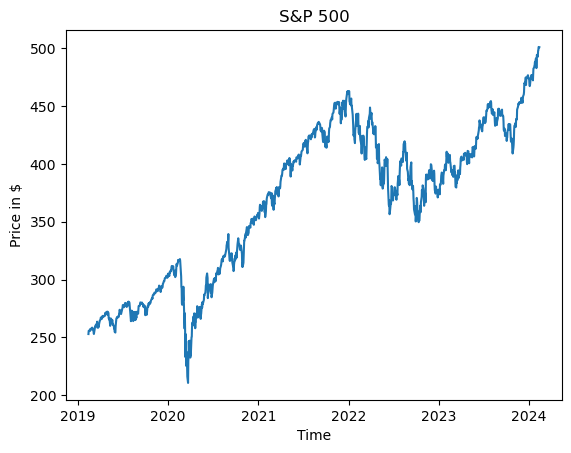

In [4]:
ticker_symbol = 'SPY'

data_spy = pdr.get_data_yahoo(ticker_symbol, dt.datetime.now() - dt.timedelta(days=365*5), 
                              dt.datetime.now())
plt.plot(data_spy['Adj Close'])
plt.title('S&P 500')
plt.xlabel('Time')
plt.ylabel('Price in $')
plt.show()

S0 = data_spy['Adj Close'].iloc[-1] # the current stock price derived from the S&P 500 Market

In [5]:
spy_dates= options.get_expiration_dates(ticker_symbol)
 
spy_options = {}
for date in spy_dates:
    spy_options[date] = options.get_options_chain(ticker_symbol, date)

In [6]:
spy_calls_impl = {}

for date, data in spy_options.items():
    spy_calls_impl[date] = data['calls'][['Strike', 'Last Price', 'Implied Volatility']]

In [10]:
frame = DataFrame(spy_calls_impl[spy_dates[0]])
dtm = dt.datetime.strptime(spy_dates[0], "%B %d, %Y")
dtm = dtm.replace(hour=23, minute=59)

frame[dtm] = frame['Implied Volatility']

frame = frame.drop(['Last Price', 'Implied Volatility'], axis=1)

frame.set_index('Strike', inplace=True)

for date in range(1, len(spy_dates)):
    date_str = spy_dates[date]
    
    frm = DataFrame(spy_calls_impl[date_str])
    loop_date = dt.datetime.strptime(spy_dates[date], "%B %d, %Y")
    loop_date = loop_date.replace(hour=23, minute=59)
    
    frm[loop_date] = frm['Implied Volatility']
    frm = frm.drop(['Last Price', 'Implied Volatility'], axis=1)
    frm.set_index('Strike', inplace=True)

    frame = pd.concat([frame, frm], axis=1)

frame.dropna(inplace=True)
frame

,2024-02-12 23:59:00,2024-02-13 23:59:00,2024-02-14 23:59:00,2024-02-15 23:59:00,2024-02-16 23:59:00,2024-02-20 23:59:00,2024-02-21 23:59:00,2024-02-22 23:59:00,2024-02-23 23:59:00,2024-02-29 23:59:00,...,2024-09-20 23:59:00,2024-09-30 23:59:00,2024-12-20 23:59:00,2024-12-31 23:59:00,2025-01-17 23:59:00,2025-03-21 23:59:00,2025-06-20 23:59:00,2025-12-19 23:59:00,2026-01-16 23:59:00,2026-12-18 23:59:00
Strike,,,,,,,,,,,,,,,,,,,,,
480.0,49.12%,35.74%,31.08%,29.61%,27.43%,21.83%,21.92%,22.56%,21.75%,20.48%,...,21.24%,21.10%,22.48%,22.37%,22.40%,23.77%,23.75%,24.52%,24.47%,25.57%
490.0,23.73%,18.46%,18.31%,20.17%,18.67%,14.97%,15.04%,16.07%,16.06%,15.78%,...,19.84%,19.73%,21.17%,21.18%,21.30%,22.74%,23.31%,23.77%,23.71%,25.18%
495.0,11.82%,14.16%,14.80%,15.39%,14.97%,12.51%,12.99%,13.47%,13.72%,13.94%,...,19.10%,19.08%,20.60%,20.62%,20.80%,22.23%,22.85%,23.38%,23.65%,24.72%
500.0,6.01%,12.38%,12.53%,13.11%,12.84%,11.05%,11.55%,12.05%,12.26%,12.54%,...,18.42%,18.45%,20.05%,20.06%,20.07%,21.74%,22.41%,22.97%,22.98%,24.50%
505.0,7.81%,11.65%,11.77%,12.05%,12.15%,10.27%,10.95%,11.16%,11.40%,11.71%,...,17.89%,17.76%,19.49%,19.55%,19.84%,21.25%,21.99%,22.61%,22.61%,24.16%
510.0,14.06%,12.16%,11.67%,11.72%,11.77%,9.97%,10.49%,10.79%,11.00%,11.16%,...,17.24%,17.29%,18.98%,19.01%,19.21%,20.78%,21.54%,22.45%,22.28%,23.87%
515.0,12.50%,16.02%,13.09%,12.40%,12.40%,10.06%,10.40%,10.66%,10.67%,10.83%,...,16.65%,16.67%,18.48%,18.53%,18.69%,20.31%,20.65%,21.84%,21.90%,23.59%
520.0,27.34%,19.14%,16.99%,6.25%,13.87%,11.04%,11.04%,10.94%,10.96%,10.67%,...,16.11%,16.07%,17.98%,18.04%,18.12%,19.86%,20.56%,21.71%,21.54%,23.31%
525.0,33.59%,23.44%,19.14%,17.97%,6.25%,12.60%,12.40%,12.16%,11.62%,10.96%,...,15.61%,15.60%,17.51%,17.54%,17.68%,18.61%,20.28%,21.13%,21.42%,23.07%


In [11]:
for column in frame.columns:
    frame[column] = frame[column].str.replace('%', '').astype(float)

frame = frame.loc[:, (frame != 0).all()]
frame = frame.iloc[:, 0:20]
frame

,2024-02-12 23:59:00,2024-02-13 23:59:00,2024-02-14 23:59:00,2024-02-15 23:59:00,2024-02-16 23:59:00,2024-02-20 23:59:00,2024-02-21 23:59:00,2024-02-22 23:59:00,2024-02-23 23:59:00,2024-02-29 23:59:00,2024-03-01 23:59:00,2024-03-08 23:59:00,2024-03-15 23:59:00,2024-03-22 23:59:00,2024-03-28 23:59:00,2024-04-19 23:59:00,2024-04-30 23:59:00,2024-05-17 23:59:00,2024-05-31 23:59:00,2024-06-21 23:59:00
Strike,,,,,,,,,,,,,,,,,,,,
480.0,49.12,35.74,31.08,29.61,27.43,21.83,21.92,22.56,21.75,20.48,20.20,19.95,19.79,18.78,18.27,18.59,18.78,19.60,19.98,20.24
490.0,23.73,18.46,18.31,20.17,18.67,14.97,15.04,16.07,16.06,15.78,15.69,16.28,16.21,15.83,15.56,16.38,16.66,17.65,17.97,18.40
495.0,11.82,14.16,14.80,15.39,14.97,12.51,12.99,13.47,13.72,13.94,14.26,14.65,14.78,14.44,14.27,15.22,15.61,16.63,16.94,17.49
500.0,6.01,12.38,12.53,13.11,12.84,11.05,11.55,12.05,12.26,12.54,12.71,13.37,13.42,13.37,13.39,14.44,14.71,15.77,16.21,16.66
505.0,7.81,11.65,11.77,12.05,12.15,10.27,10.95,11.16,11.40,11.71,11.90,12.56,12.65,12.66,12.68,13.68,14.01,15.06,15.42,16.10
510.0,14.06,12.16,11.67,11.72,11.77,9.97,10.49,10.79,11.00,11.16,11.35,11.99,12.07,12.08,12.25,13.14,13.41,14.42,14.83,15.35
515.0,12.50,16.02,13.09,12.40,12.40,10.06,10.40,10.66,10.67,10.83,10.99,11.56,11.73,11.80,11.86,12.63,12.91,13.88,14.27,14.76
520.0,27.34,19.14,16.99,6.25,13.87,11.04,11.04,10.94,10.96,10.67,10.83,11.31,11.48,11.51,11.62,12.32,12.59,13.41,13.79,14.28
525.0,33.59,23.44,19.14,17.97,6.25,12.60,12.40,12.16,11.62,10.96,11.06,11.18,11.32,11.33,11.47,12.04,12.28,13.06,13.38,13.85


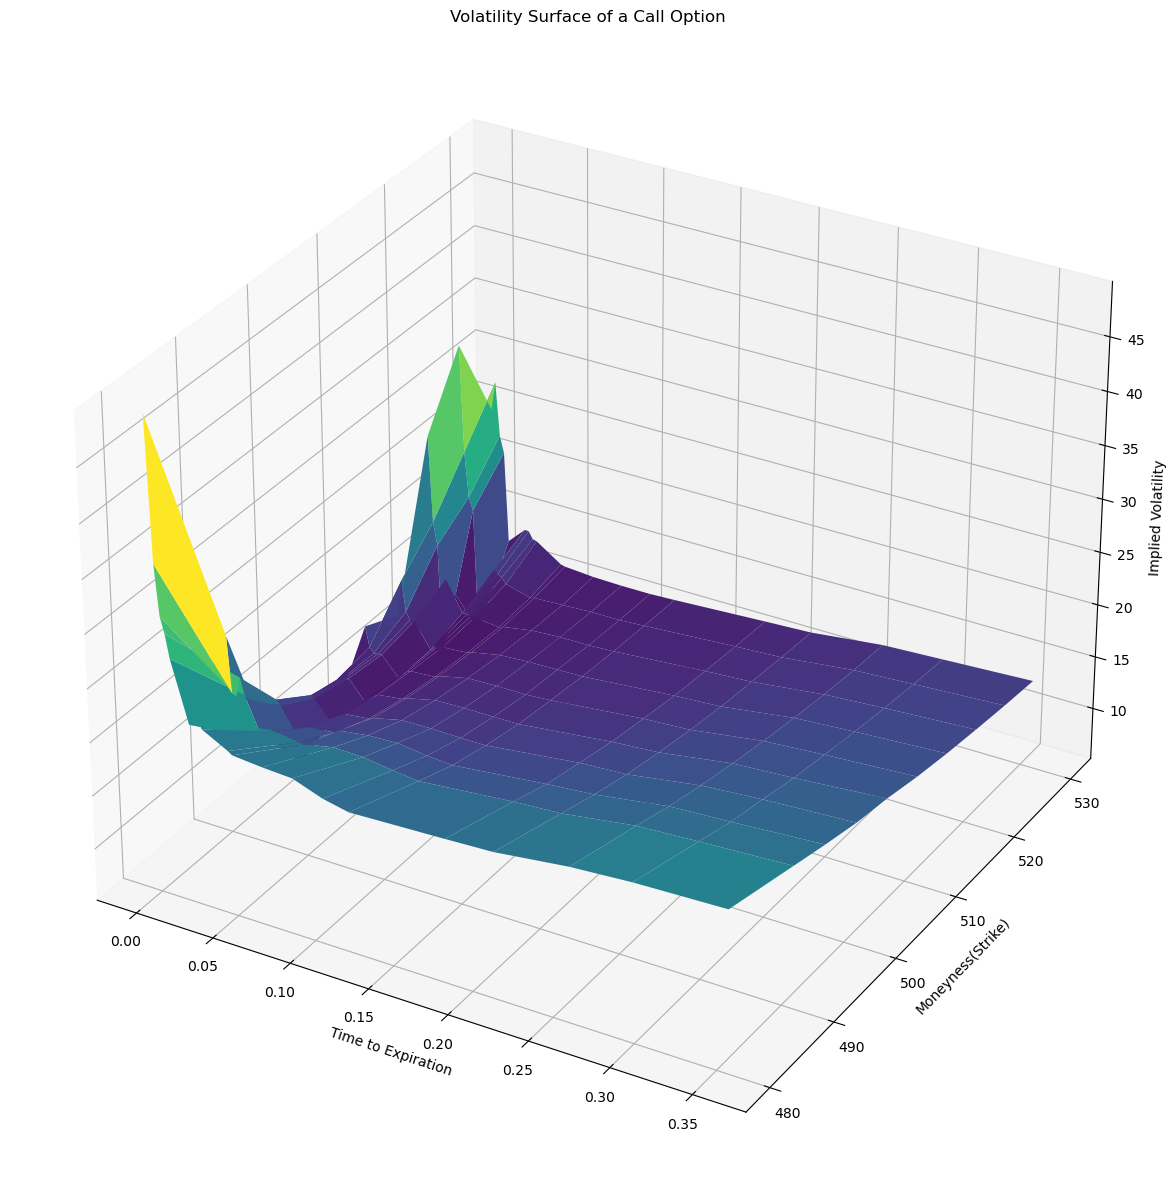

In [12]:
x = frame.index
y = frame.columns
y = (y - dt.datetime.now()).days/365
X, Y = np.meshgrid(x, y)

Z = frame.values

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 15)) 

surf = ax.plot_surface(Y, X, Z.T, cmap=cm.viridis, shade='interp')

ax.set_title('Volatility Surface of a Call Option')
ax.set_xlabel('Time to Expiration')
ax.set_ylabel('Moneyness(Strike)')
ax.set_zlabel('Implied Volatility')

plt.show()